In [108]:
# install.packages('ROCR')
# install.packages('e1071')

In [109]:
library(dplyr)
library(glmnet)
library(ROCR)
library(e1071)
library(data.table)
library(caret)
library(neuralnet)
library(randomForest)
library(pROC)

In [110]:
split_number = 0.5
folds = 5

# Load data
train = fread('train_v2.csv')
transactions = fread('transactions_v2.csv')
setkey(train,"msno")
setkey(transactions,"msno")

# Join Data by "msno"
merged_data = merge(train, transactions, by="msno")

In [111]:
merged_data = merged_data[sample(.N,1000)]

In [112]:
# Get indicies
y = merged_data[, 1]
y = y[[1]]

In [113]:
# Extract random sample of indices for test data
set.seed(42)
test_inds = createDataPartition(y = 1:length(y), p = split_number, list = F)

# Split data into test/train using indices
X_train = as.data.frame(merged_data[-test_inds, ])
X_test = as.data.frame(merged_data[test_inds, ])

In [114]:
# Fitting to the model
model <- randomForest(is_churn~payment_method_id+payment_plan_days+plan_list_price+actual_amount_paid+is_auto_renew+is_cancel, 
             data = X_train)

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"

The classification error is 0.064 
Area under the curve: 0.8895


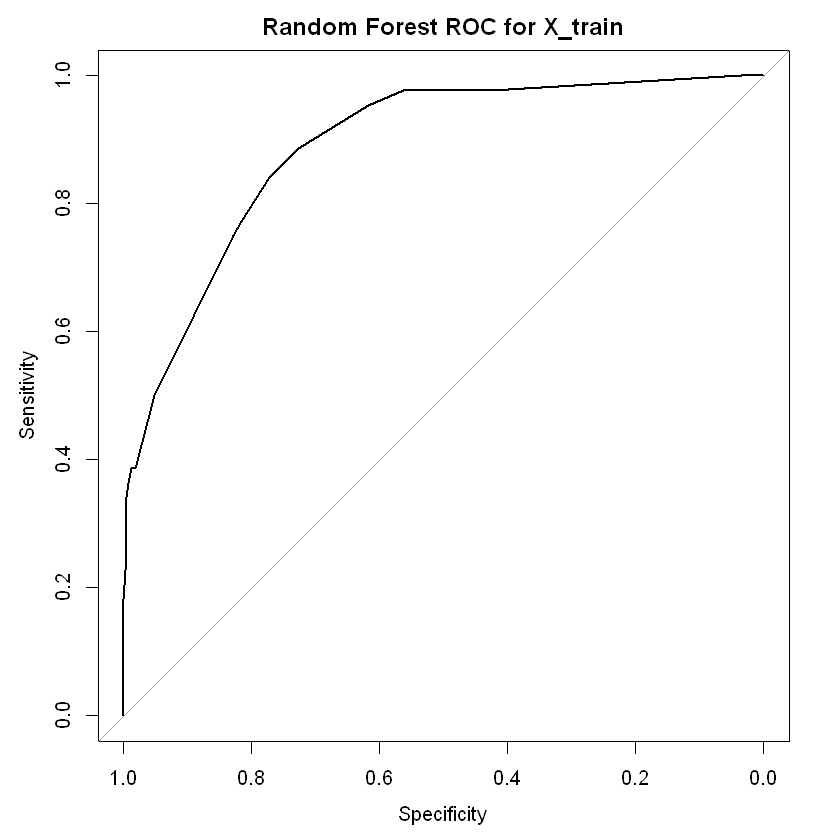

In [120]:
# Predicting probabilities
prob=predict(model,X_train,type="response")

# Gathering predictions and calculating prediction error
preds = round(prob)
pred_error = mean(preds != X_train$is_churn)
cat('The classification error is', pred_error,'\n')

# Calculating ROC
X_train$prob <- prob
g <- roc(is_churn ~ prob, data = X_train, levels = c(0, 1), direction = "<")

# Plotting ROC and calculating AUC
plot(g, main='Random Forest ROC for X_train')
print(auc(g))

The classification error is 0.084 
Area under the curve: 0.7738


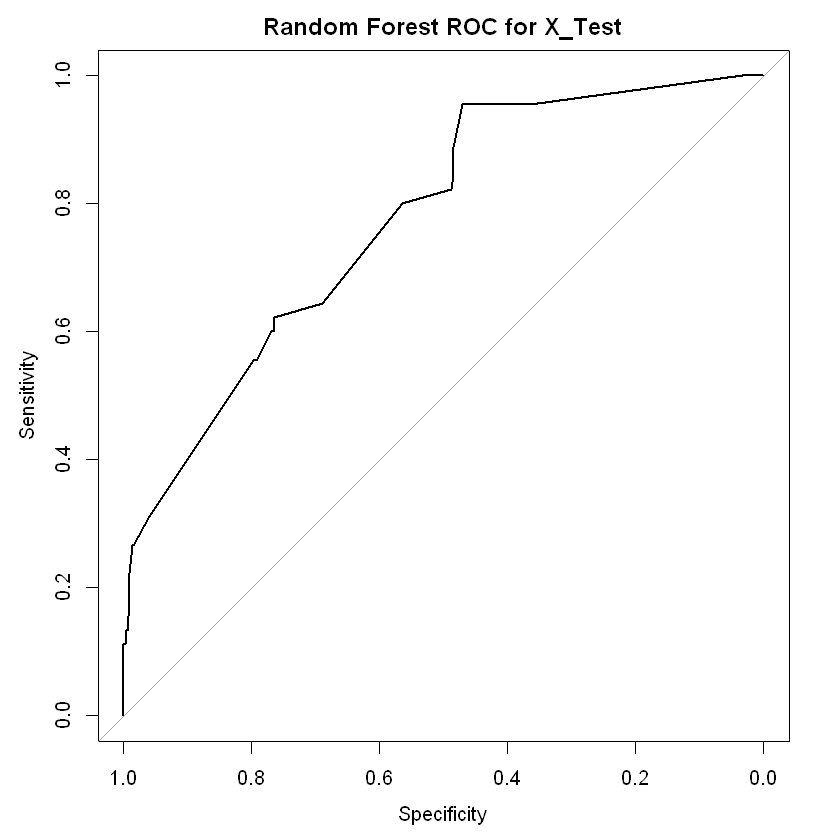

In [121]:
# Predicting probabilities
prob=predict(model,X_test,type="response")

# Gathering predictions and calculating prediction error
preds = round(prob)
pred_error = mean(preds != X_test$is_churn)
cat('The classification error is', pred_error,'\n')

# Calculating ROC
X_test$prob <- prob
g <- roc(is_churn ~ prob, data = X_test, levels = c(0, 1), direction = "<")

# Plotting ROC and calculating AUC
plot(g, main='Random Forest ROC for X_Test')
print(auc(g))

In [117]:
##(3) NN
model.nn <- neuralnet(is_churn~payment_method_id+payment_plan_days+plan_list_price+actual_amount_paid+is_auto_renew+is_cancel, 
                      data = X_train, hidden=5)

The classification error is 0.064 


Warning message in roc.default(response, predictors[, 1], ...):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."

Area under the curve: 0.8434


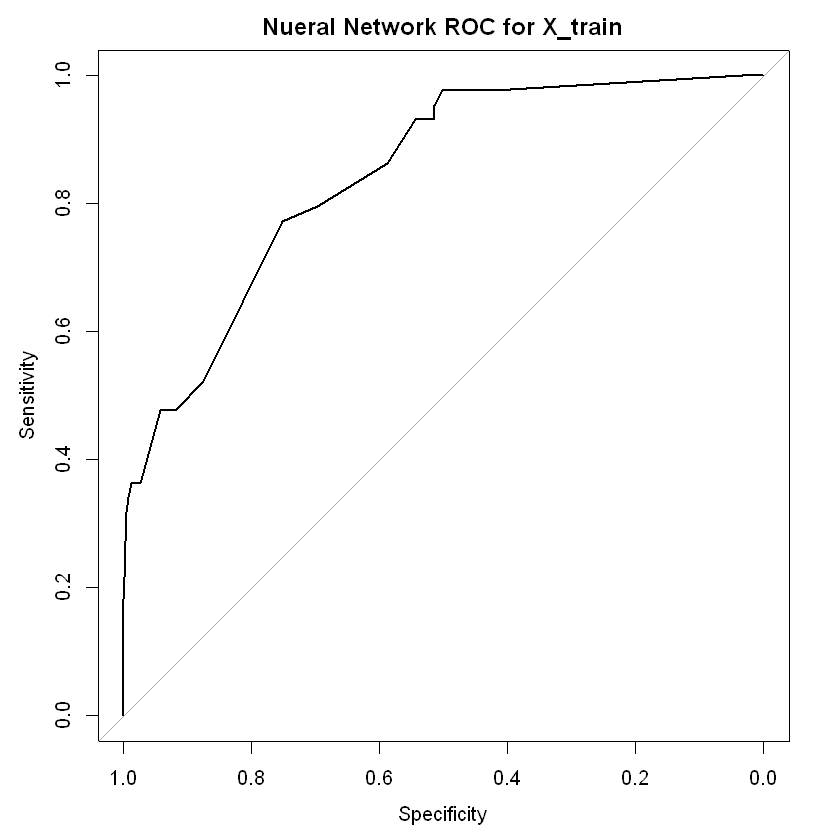

In [123]:
# Predicting probabilities
prob=predict(model.nn,X_train,type="response")

# Gathering predictions and calculating prediction error
preds = round(prob)
pred_error = mean(preds != X_train$is_churn)
cat('The classification error is', pred_error,'\n')

# Calculating ROC
X_train$prob <- prob
g <- roc(is_churn ~ prob, data = X_train, levels = c(0, 1), direction = "<")

# Plotting ROC and calculating AUC
plot(g, main='Nueral Network ROC for X_train')
print(auc(g))

The classification error is 0.074 


Warning message in roc.default(response, predictors[, 1], ...):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."

Area under the curve: 0.8063


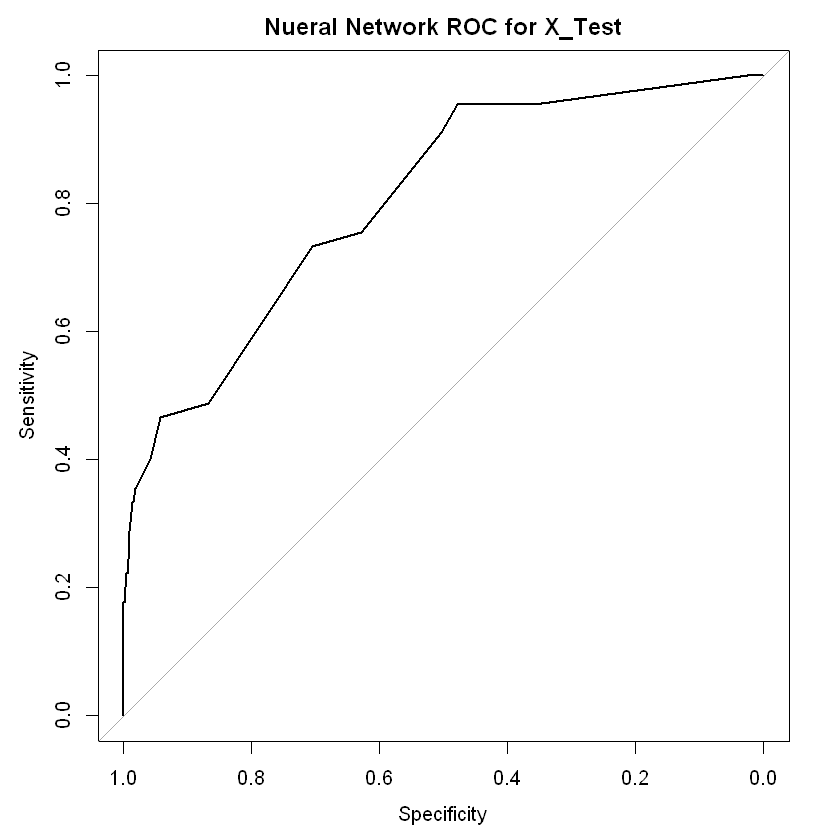

In [122]:
# Predicting probabilities
prob=predict(model.nn,X_test,type="response")

# Gathering predictions and calculating prediction error
preds = round(prob)
pred_error = mean(preds != X_test$is_churn)
cat('The classification error is', pred_error,'\n')

# Calculating ROC
X_test$prob <- prob
g <- roc(is_churn ~ prob, data = X_test, levels = c(0, 1), direction = "<")

# Plotting ROC and calculating AUC
plot(g, main='Nueral Network ROC for X_Test')
print(auc(g))